In [2]:
from IPython.display import Image
Image(url= "https://assets.bcci.tv/watermarkoutput/bcci/photos/1456/135b5d29-7651-45cc-8f33-f12da8434ce7.jpg")

In [71]:
import numpy as np
import pandas as pd

In [72]:
match_done = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

The dataset has 18 columns. Let’s get acquainted with the columns.

id: The IPL match id.

season: The IPL season

city: The city where the IPL match was held.

date: The date on which the match was held.

team1: One of the teams of the IPL match

team2: The other team of the IPL match

toss_winner: The team that won the toss

toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’

result: The result(‘normal’, ‘tie’, ‘no result’) of the match.

dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.

winner: The winner of the match.

win_by_runs: Provides the runs by which the team batting first won

win_by_runs: Provides the number of wickets by which the team batting second won.

player_of_match: The outstanding player of the match.

venue: The venue where the match was hosted.

umpire1: One of the two on-field umpires who officiate the match.

umpire2: One of the two on-field umpires who officiate the match.

umpire3: The off-field umpire who officiates the match

In [73]:
match_done.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [74]:
#checking null values
match_done.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

It’s imperative to know the count of NaN values for each column before we proceed further.The column ‘umpire3’ has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).

In [75]:
match_done.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [76]:
match_done.info

<bound method DataFrame.info of         id    Season           city        date                        team1  \
0        1  IPL-2017      Hyderabad  05-04-2017          Sunrisers Hyderabad   
1        2  IPL-2017           Pune  06-04-2017               Mumbai Indians   
2        3  IPL-2017         Rajkot  07-04-2017                Gujarat Lions   
3        4  IPL-2017         Indore  08-04-2017       Rising Pune Supergiant   
4        5  IPL-2017      Bangalore  08-04-2017  Royal Challengers Bangalore   
..     ...       ...            ...         ...                          ...   
751  11347  IPL-2019         Mumbai  05-05-2019        Kolkata Knight Riders   
752  11412  IPL-2019        Chennai  07-05-2019          Chennai Super Kings   
753  11413  IPL-2019  Visakhapatnam  08-05-2019          Sunrisers Hyderabad   
754  11414  IPL-2019  Visakhapatnam  10-05-2019               Delhi Capitals   
755  11415  IPL-2019      Hyderabad  12-05-2019               Mumbai Indians   

       

In [77]:
#filling null values
match_done['winner'].fillna('Draw', inplace=True)
match_done['city'].fillna('Dubai', inplace=True)

In [78]:
matches = match_done.drop(columns=['umpire3'], axis=1)

In [79]:
matches.loc[matches.winner=='Draw','winner']

300    Draw
545    Draw
570    Draw
744    Draw
Name: winner, dtype: object

In [80]:
#Replacing Full names of the teams with their abbreviations 
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Delhi Capitals' ,
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','DD','SRH','RPS','RPS','KTK','PW'],inplace=True)
print(matches)

        id    Season           city        date team1 team2 toss_winner  \
0        1  IPL-2017      Hyderabad  05-04-2017   SRH   RCB         RCB   
1        2  IPL-2017           Pune  06-04-2017    MI   RPS         RPS   
2        3  IPL-2017         Rajkot  07-04-2017    GL   KKR         KKR   
3        4  IPL-2017         Indore  08-04-2017   RPS  KXIP        KXIP   
4        5  IPL-2017      Bangalore  08-04-2017   RCB    DD         RCB   
..     ...       ...            ...         ...   ...   ...         ...   
751  11347  IPL-2019         Mumbai  05-05-2019   KKR    MI          MI   
752  11412  IPL-2019        Chennai  07-05-2019   CSK    MI         CSK   
753  11413  IPL-2019  Visakhapatnam  08-05-2019   SRH    DD          DD   
754  11414  IPL-2019  Visakhapatnam  10-05-2019    DD   CSK         CSK   
755  11415  IPL-2019      Hyderabad  12-05-2019    MI   CSK          MI   

    toss_decision  result  dl_applied winner  win_by_runs  win_by_wickets  \
0           field  nor

In [81]:
match_done.shape

(756, 18)

In [82]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [83]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

C:\Users\Acer\AppData\Local\Temp\ipykernel_30108\2553512226.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [84]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [85]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [86]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [87]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [88]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [89]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [90]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [91]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [92]:
match_df.shape

(641, 20)

In [93]:
match_df = match_df[match_df['dl_applied'] == 0]

In [94]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [95]:
delivery_df = match_df.merge(delivery,on='match_id')

In [96]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [97]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [98]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

C:\Users\Acer\AppData\Local\Temp\ipykernel_30108\3025607697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [99]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [100]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [101]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [102]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_30108\3117972629.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [129]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 15)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

The team with the most number of wins per season.

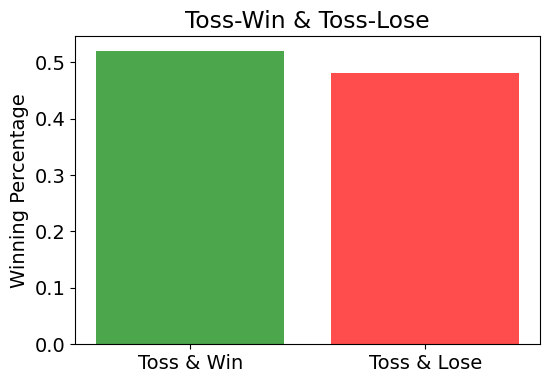

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
objects = ('Toss & Win', 'Toss & Lose')
y_pos = np.arange(len(objects))
a = len(matches[matches['toss_winner'] == matches['winner']]) / len(matches)
b = (len(matches) - (len(matches[matches['toss_winner'] == matches['winner']]))) / len(matches)
performance = [a, b]

# Define colors for bars
colors = ['green', 'red']

# Create a figure object with adjustable size
plt.figure(figsize=(6, 4))

# Create the bar plot
plt.bar(y_pos, performance, align='center', alpha=0.7, color=colors)
plt.xticks(y_pos, objects)
plt.ylabel('Winning Percentage')
plt.title('Toss-Win & Toss-Lose')

# Show plot
plt.show()


The team with the most number of wins per season.¶
Each IPL season has a fair share of excitement and adulation. No team other than Chennai Super Kings(in 2010 and 2011) was able to win the IPL trophy in succession. That is a testimony to the unpredictability of IPL.


Let’s analyze the team with the most wins in each season.

In [136]:
teams_per_season = match_done.groupby('Season')['winner'].value_counts()
teams_per_season

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
          Draw                            1
Name: winner, Length: 103, dtype: int64

In [103]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [149]:
venue_ser = matches['venue'].value_counts()

In [150]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_30108\63572973.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for items in venue_ser.iteritems():
C:\Users\Acer\AppData\Local\Temp\ipykernel_30108\63572973.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  venue_df = venue_df.append(temp_df, ignore_index=True)


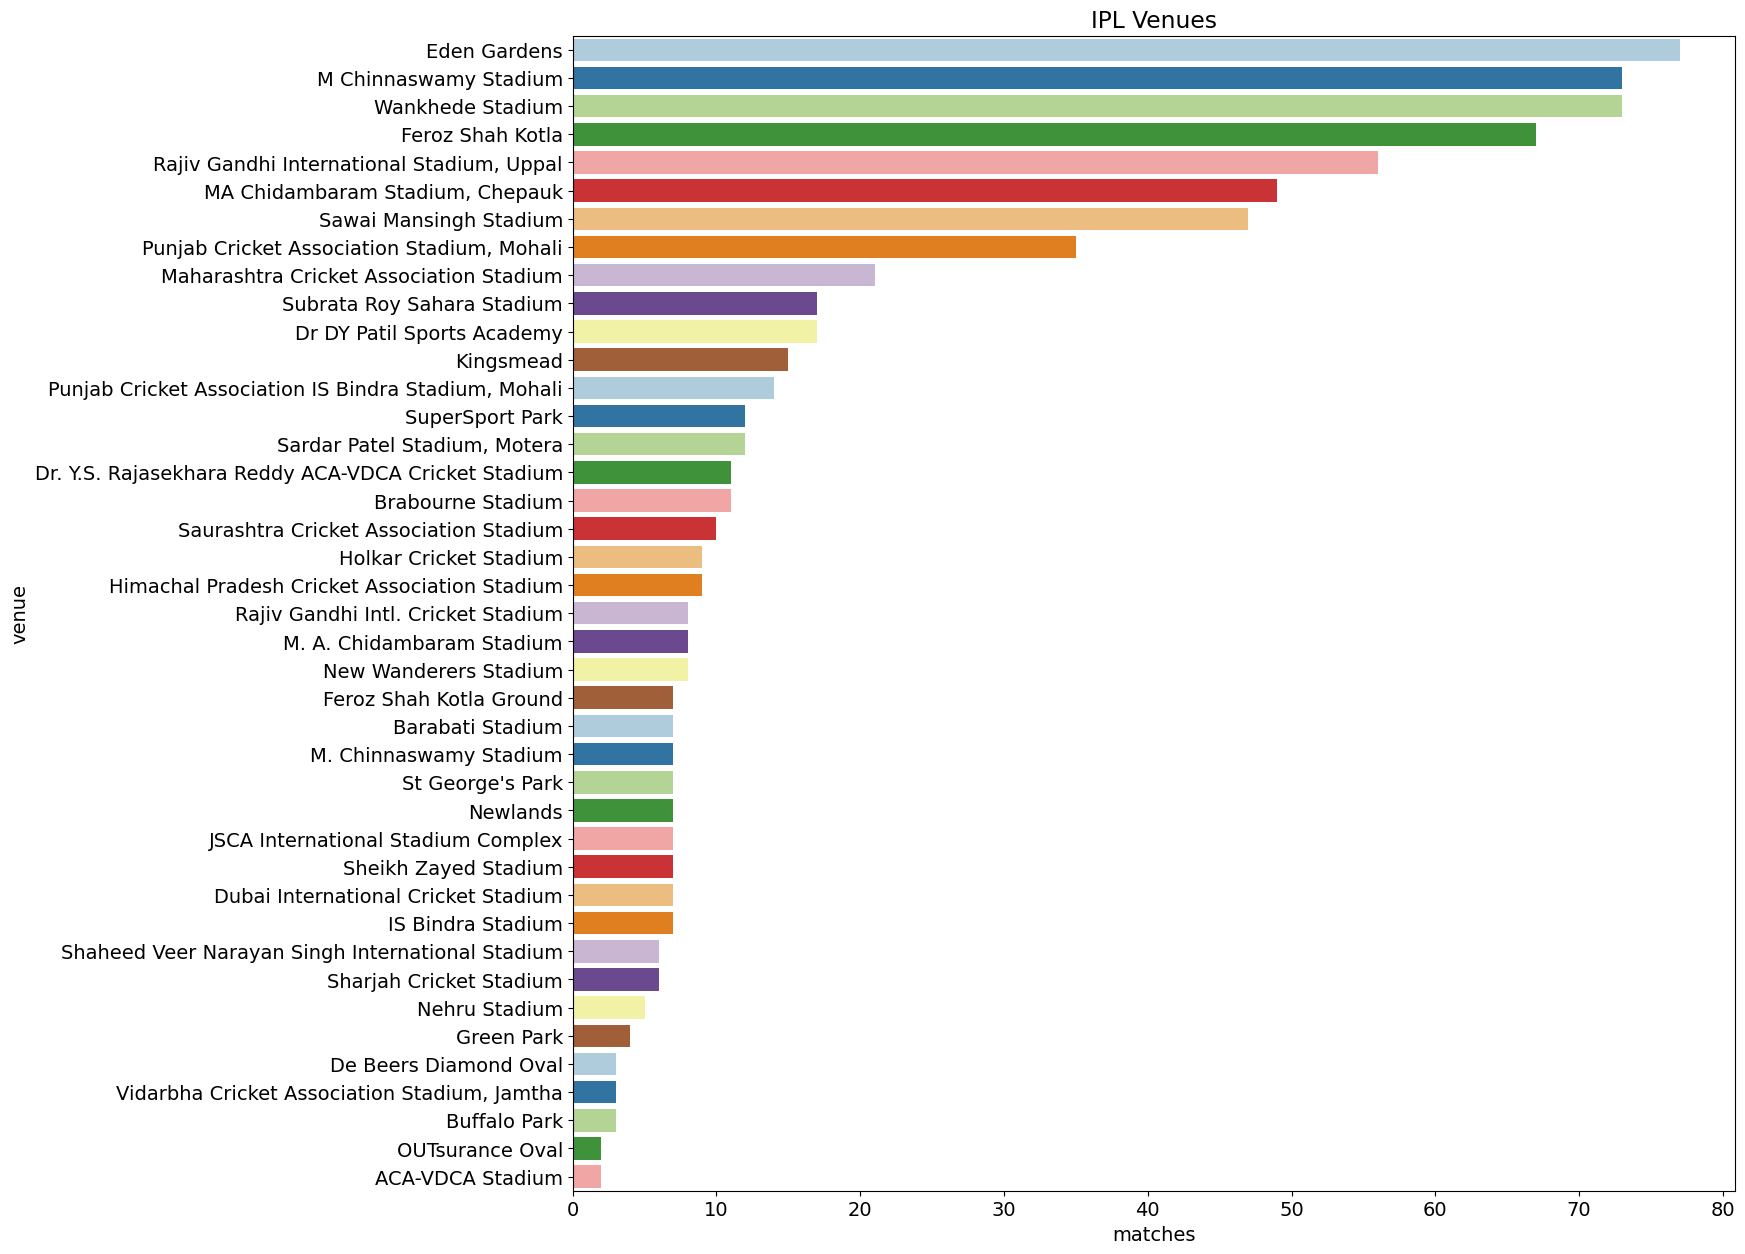

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the barplot with 'venue' as hue and setting legend to False
sns.barplot(x='matches', y='venue', hue='venue', data=venue_df, dodge=False, palette='Paired', legend=False)
plt.title("IPL Venues")

# Show plot
plt.show()


Total number of matches won by each team

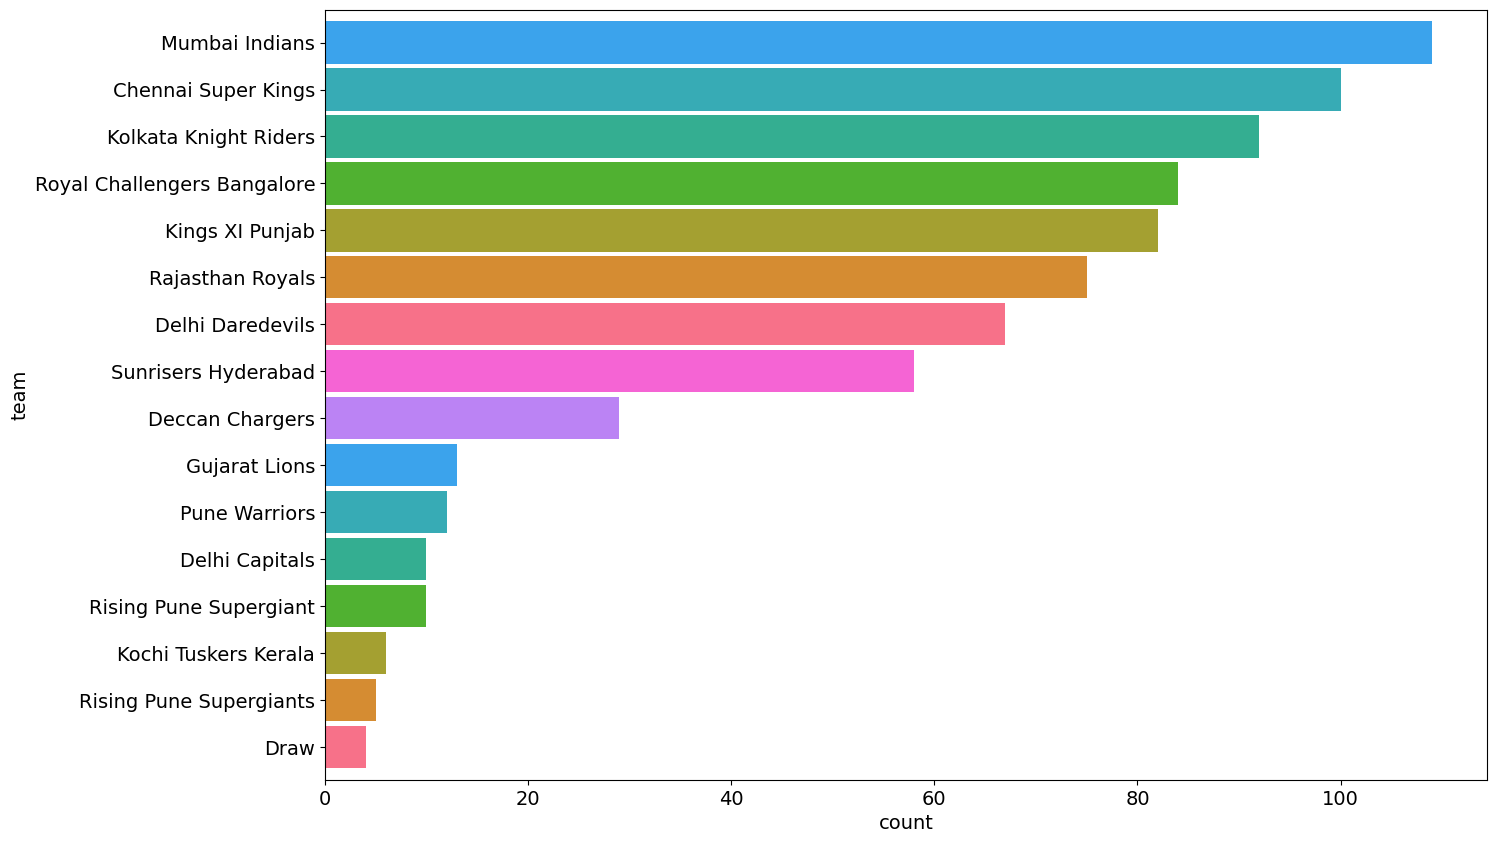

In [169]:
plt.subplots(figsize=(15,10))
ax = match_done['winner'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette("husl", 9))
ax.set_xlabel('count')
ax.set_ylabel('team')
plt.show()

Chance of winning both toss and match

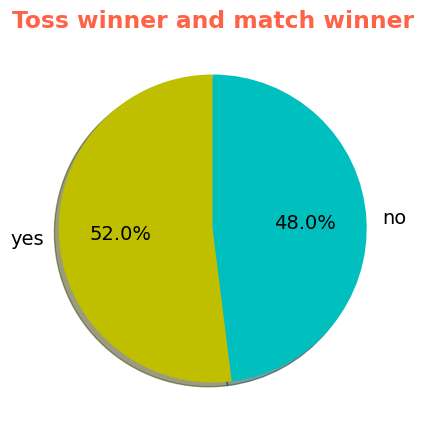

In [167]:
import matplotlib.pyplot as plt

# Data
df = match_done[match_done['toss_winner'] == match_done['winner']]
ratio = [len(df), (len(match_done) - len(df))]
labels = ['yes', 'no']

# Plot
plt.pie(ratio, labels=labels, colors=['y', 'c'], autopct='%1.1f%%', shadow=True, startangle=90)
fig = plt.gcf()
fig.set_size_inches(5, 5)

# Add bold and highlighted text annotations
title_text = "Toss winner and match winner"
highlight_color = '#FF6347'  # Highlight color (tomato)
highlighted_labels = ['yes', 'no']

plt.title(title_text, fontweight='bold', color=highlight_color)  # Title in bold and highlighted
for label in labels:
    color = 'black'
    if label in highlighted_labels:
        color = highlight_color

plt.show()


Total number of matches won at each city

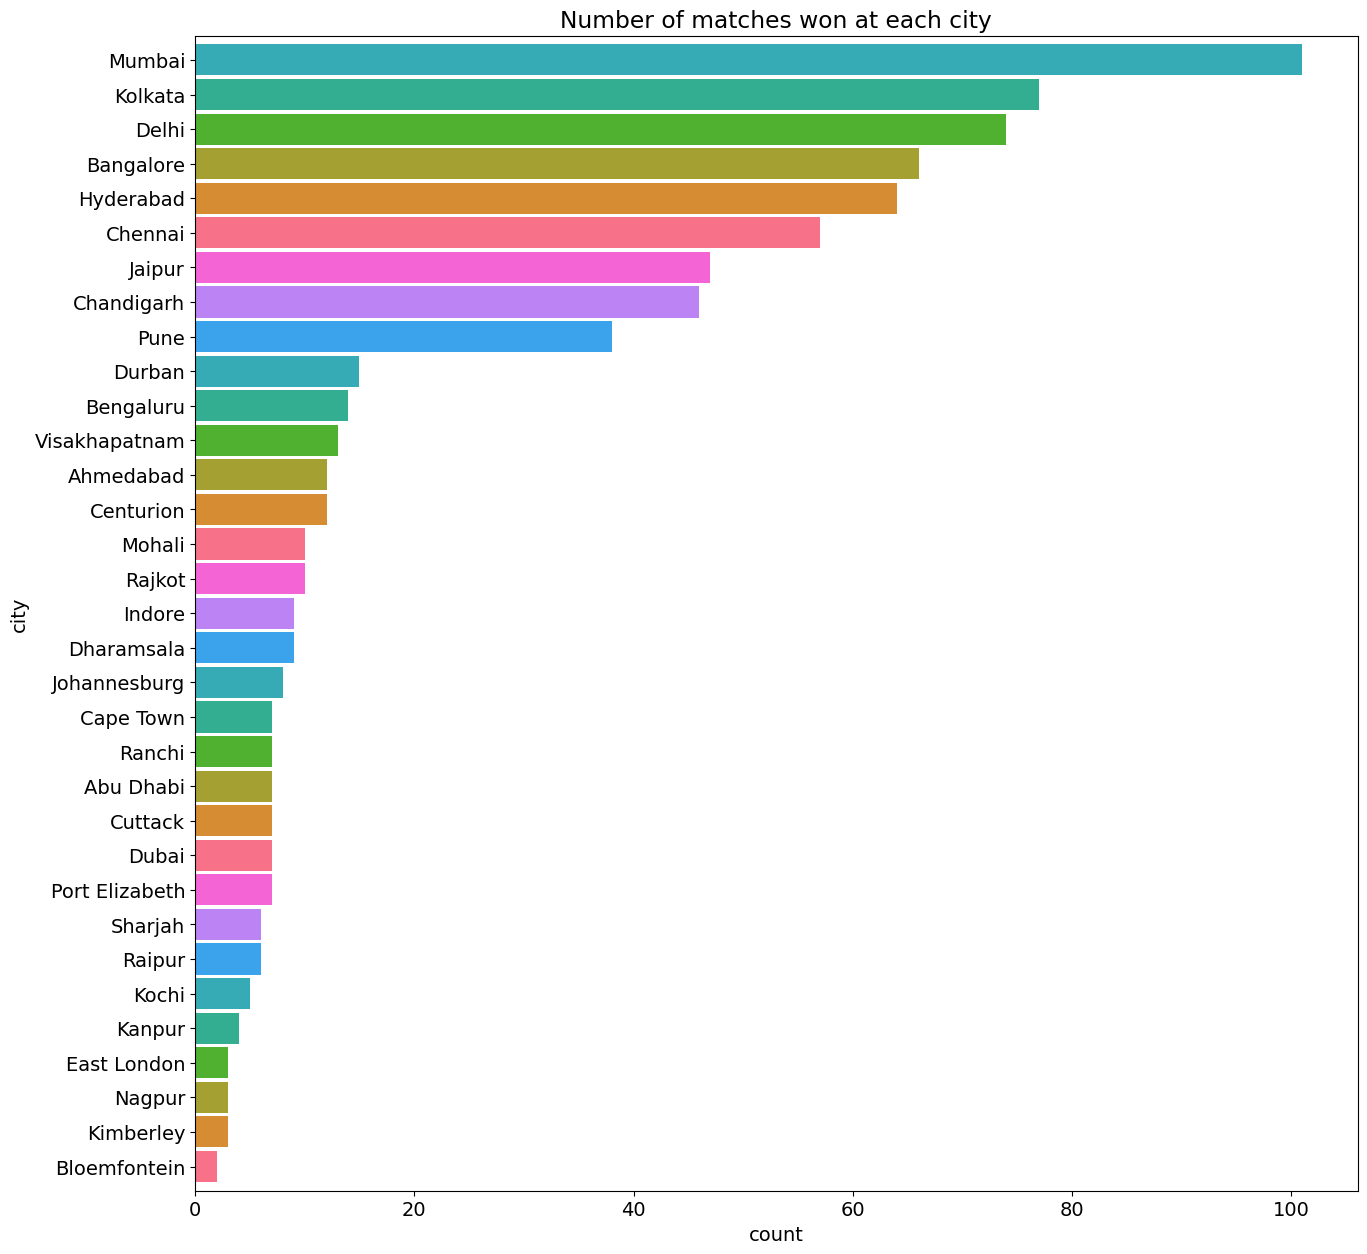

In [170]:
plt.subplots(figsize=(15,15))
ax = match_done['city'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color = sns.color_palette("husl", 9))
ax.set_xlabel('count')
ax.set_ylabel('city')
plt.title('Number of matches won at each city')
plt.show()

In [154]:
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


Observations:
Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.

Till 2019, IPL matches were hosted by 40 venues.

The most successful IPL team

In a game of sports, every team competes for victory. Hence, the team that has registered the most number of victories is the most successful.

In [155]:
team_wins_ser = matches['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_30108\2742903620.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for items in team_wins_ser.iteritems():
C:\Users\Acer\AppData\Local\Temp\ipykernel_30108\2742903620.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)


In [156]:
team_wins_df 

,team,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,DD,77
6,RR,75
7,SRH,58
8,DC,29
9,RPS,15


In [104]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [105]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [106]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [107]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [108]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [109]:
final_df = final_df.sample(final_df.shape[0])

In [110]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
52840,Rajasthan Royals,Mumbai Indians,Jaipur,19,29,8,94,4.945055,3.931034,1


In [111]:
final_df.dropna(inplace=True)

In [112]:
final_df = final_df[final_df['balls_left'] != 0]

In [113]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [114]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
126777,Chennai Super Kings,Royal Challengers Bangalore,Bengaluru,81,37,6,213,9.542169,13.135135
81392,Chennai Super Kings,Mumbai Indians,Mumbai,85,47,3,139,4.438356,10.851064
84694,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,169,95,9,190,5.040000,10.673684
139868,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,67,41,5,142,5.696203,9.804878
118086,Kings XI Punjab,Kolkata Knight Riders,Kolkata,47,30,6,164,7.800000,9.400000
...,...,...,...,...,...,...,...,...,...
115906,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,29,43,8,138,8.493506,4.046512
2141,Kings XI Punjab,Delhi Daredevils,Delhi,92,34,4,188,6.697674,16.235294
84260,Delhi Daredevils,Chennai Super Kings,Chennai,69,35,5,168,6.988235,11.828571
69767,Mumbai Indians,Kolkata Knight Riders,Mumbai,124,91,10,140,3.310345,8.175824


In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [117]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [118]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [119]:
y_pred = pipe.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8025089354544818

In [121]:
pipe.predict_proba(X_test)[10]

array([0.04976457, 0.95023543])

In [122]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [123]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [124]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,55.8,44.2
10467,2,8,0,50.5,49.5
10473,3,1,0,57.2,42.8
10479,4,7,1,69.1,30.9
10485,5,12,0,59.0,41.0
10491,6,13,0,46.6,53.4
10497,7,9,0,40.7,59.3
10505,8,15,0,27.0,73.0
10511,9,7,0,24.8,75.2
10518,10,17,0,13.5,86.5


Text(0.5, 1.0, 'Target-178')

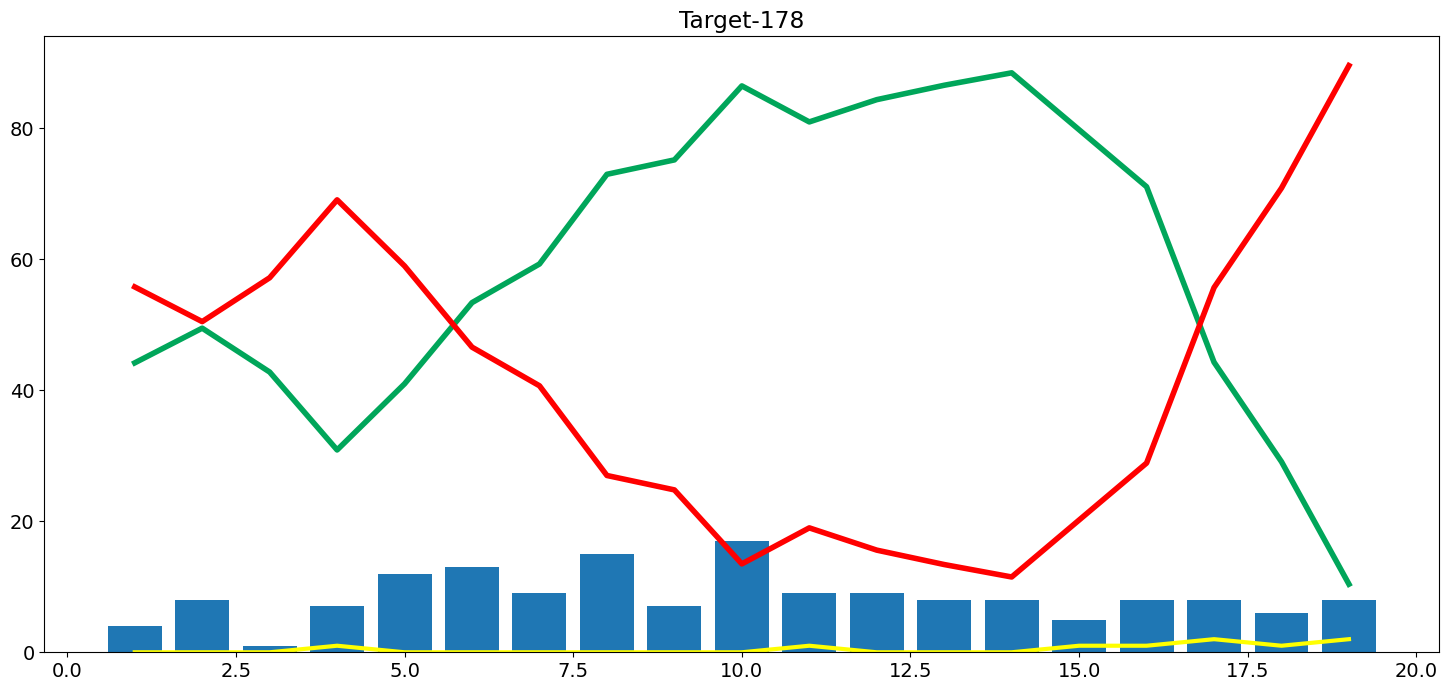

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [126]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [127]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [128]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))